# Principal Components Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline  


In [2]:
#Load data, subtract mean, etc
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X,y     = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
sc      = StandardScaler()
print(type(y_train))
print(y_train.shape)
print(X.shape)
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.fit_transform(X_test)
print(X_train_std.shape)
print(X_train.shape)

<class 'numpy.ndarray'>
(142,)
(178, 13)
(142, 13)
(142, 13)


In [3]:
#compute covariance, eigenvals and eigenvecs
cov_mat = np.cov(X_train_std.T)
#print(cov_mat)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
#print('\nEigenvalues \n%s' % eigen_vals)

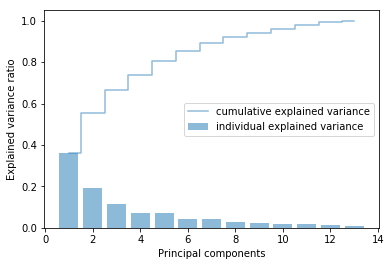

In [4]:
#compute explained variance and plot
tot         = sum(eigen_vals)
var_exp     = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')	
plt.step(range(1,14), cum_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

<class 'numpy.ndarray'>
(142, 2)
(142,)


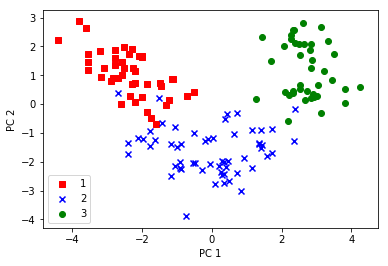

In [5]:
#perform dimensionality reduction
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
#print('Matrix W:\n', w)
X_train_pca = X_train_std.dot(w)
cov_mat = np.cov(X_train_pca.T)
print(cov_mat)
colors = ['r','b','g']
markers = ['s', 'x', 'o']

for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

[[ 4.85234416 -0.27786518]
 [-0.27786518  2.63868807]]


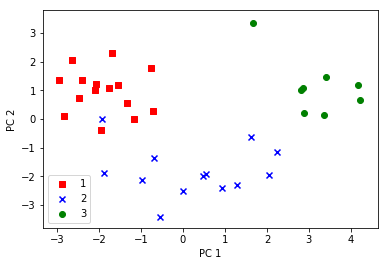

In [6]:
X_test_pca = X_test_std.dot(w)
cov_mat = np.cov(X_test_pca.T)
print(cov_mat)
for l,c,m in zip(np.unique(y_test), colors, markers):
    plt.scatter(X_test_pca[y_test==l,0],X_test_pca[y_test==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Dataset consists of 400 faces


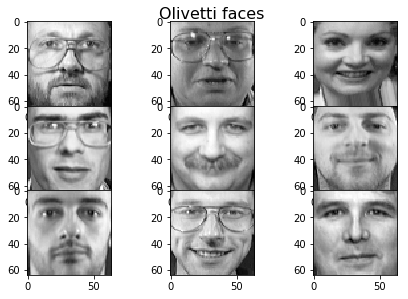

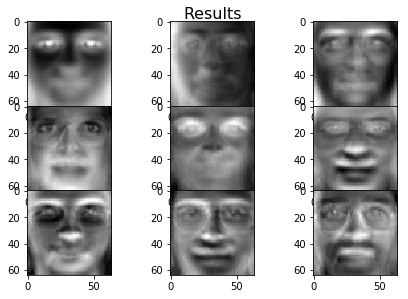

In [7]:
#Eigenfaces
#Part of example from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

n_row, n_col = 3, 3
n_components = n_row * n_col
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)

#Define function to plot imagery
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure()
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

scikit_pca = PCA(n_components = n_components, whiten=True)
X_spca = scikit_pca.fit_transform(faces.T)

plot_gallery("Olivetti faces", faces[0:n_components,:])
plot_gallery('Results', X_spca.T)


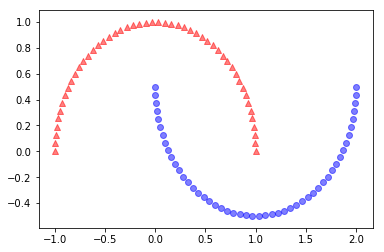

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0,0], X[y==0, 1], color='red', marker = '^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1, 1], color='blue', marker = 'o', alpha=0.5)
plt.show()

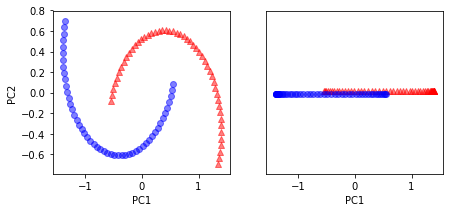

In [9]:
# Apply standard PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker = '^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker = 'o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1))+0.02, color='red', marker = '^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()